In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(color_codes=True)

### Task 1: Exploratory Analysis

In [2]:
# Reading data
data = pd.read_csv('../Data/j0001_train.csv')
data.head()

,feature1,feature2,feature3,feature4,target
0,0.885598,-0.058136,-0.502394,-0.072880,4.999557
1,1.391696,0.350938,0.311445,-0.780685,56.613234
2,-0.599735,-0.072272,1.541158,-0.384914,43.374539
3,1.108150,1.924439,-0.068485,1.985521,50.226308
4,-0.724598,-1.485027,-1.755203,-0.254649,-107.187888


In [3]:
# Checking dimensions of the dataset
print('Number of Rows:', data.shape[0])
print('Number of Columns:', data.shape[1])

Number of Rows: 2100
Number of Columns: 5


In [4]:
# Checking data types
data_types = data.dtypes
print('Data types:')
print('feature1 Column:', data_types[0])
print('feature2 Column:', data_types[1])
print('feature3 Column:', data_types[2])
print('feature4 Column:', data_types[3])

Data types:
feature1 Column: float64
feature2 Column: float64
feature3 Column: float64
feature4 Column: float64


In [5]:
# Checking number of duplicated rows
duplicated_rows = data[data.duplicated()] 
print('Number of duplicated rows:', duplicated_rows.shape[0])

Number of duplicated rows: 0


In [6]:
# Checking number of NAs and null values 
columns = data.columns
table = pd.DataFrame(columns=['Column Name', 'Null Values', 'NAs'], index=[0,1,2,3,4])
for i in range (len(columns)):
    NAs = pd.isna(data[columns[i]]).sum()
    NVs = pd.isnull(data[columns[i]]).sum()
    table.iloc[i] = [columns[i], NAs, NVs]
table

,Column Name,Null Values,NAs
0,feature1,0,0
1,feature2,0,0
2,feature3,0,0
3,feature4,0,0
4,target,0,0


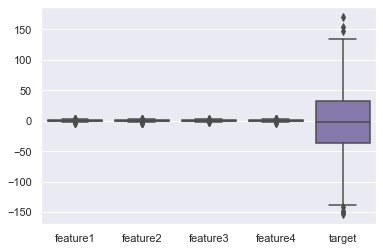

In [7]:
# Checking outliers
ax = sns.boxplot(data=data)

By checking the boxplot of each variable, I observed that the target column has some outliers. For this reason I print its boxplot separately to see better the outliers.

<AxesSubplot:xlabel='target'>

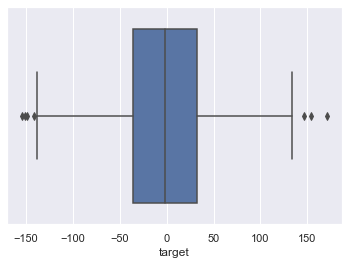

In [8]:
sns.boxplot(x=data['target'])

<AxesSubplot:>

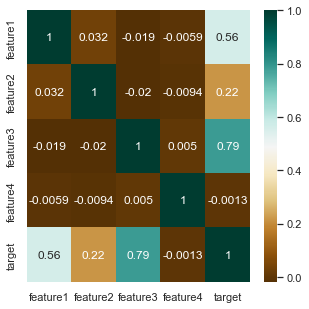

In [9]:
# Checking correlations among the variables
plt.figure(figsize=(5,5))
correlations = data.corr()
sns.heatmap(correlations,cmap="BrBG",annot=True)

### Task 2: Modelling

To choose the best model, it is necessary to compare different models by testing them with a validate dataset. In this case, we only have the 'j0001_train.csv' dataset. For this reason, I will split the dataset into train and valid data.

In [10]:
# 70% to train, 30% to validate
train_split = int(2100*0.7)
print(train_split)

1470


In [11]:
x_train = data[['feature1', 'feature2', 'feature3', 'feature4']][0:int(train_split)]
y_train = data['target'][0:int(train_split)]

x_valid = data[['feature1', 'feature2', 'feature3', 'feature4']][int(train_split):]
y_valid = data['target'][int(train_split):]
y_valid.index = pd.RangeIndex(start=0, stop=630, step=1)

print('Train dataset dimensions:', x_train.shape, y_train.shape)
print('Valid dataset dimensions:', x_valid.shape, y_valid.shape)


Train dataset dimensions: (1470, 4) (1470,)
Valid dataset dimensions: (630, 4) (630,)


#### Linear Regression Model

In [12]:
# Creating Linear Regression Model
model_lr = LinearRegression().fit(x_train,y_train)

In [13]:
# Validating Linear Regression Model
y_pred_lr = model_lr.predict(x_valid)

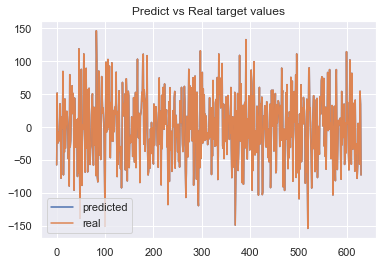

In [14]:
# Comparing the predictions and the real values by plotting them
plt.title('Predict vs Real target values')
plt.plot(y_pred_lr)
plt.plot(y_valid)
plt.legend(labels=['predicted', 'real'])

In [15]:
# Check error
mean_squared_error(y_pred_lr, y_valid)

4.0267213781387306e-28

As can be observed from the results, the Linear Regression model predicts the validation dataset very accurately as the error is almost 0. Moreover, it can be seen from the plot printed above, that real and predicted values matched pretty well. In case the results weren't the expected I should have try other models and compare them.

### Predicting with the X_test values provided

In [16]:
# Reading X_test data
x_test = pd.read_csv('../Data/j0001_X_test.csv')

In [17]:
# Predicting with X_test data
y_test_pred = model_lr.predict(x_test)

In [18]:
y_test_pred = pd.DataFrame(y_test_pred, columns = ['target'])

In [19]:
y_test_pred.to_csv('../Data/results.csv')